XOR - BP


In [1]:
import numpy as np
import pandas as pd

# Setting up $X$ and $y$

$X$ can be whatever YOU want it to be.....

For XOR

In [2]:
print("STARTING\n.......")
X = np.array( [[0, 0], [0, 1], [1, 0] , [1, 1] ])
print("X is:\n", X)   
print("The shape of X is\n", X.shape)

STARTING
.......
X is:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
The shape of X is
 (4, 2)


Set $y$ to match with your choice of $X$

These are just examples I was playing with....

In [3]:
y = np.array(( [[0], [1], [1], [0]] ))
print("y is:\n", y) 
print("The shape of Y is\n", y.shape)

y is:
 [[0]
 [1]
 [1]
 [0]]
The shape of Y is
 (4, 1)


# Neural Network Class object code

**NOTE** 

You can set the parameters randomly or by hand
Both options are below.


In [4]:
class NeuralNetwork(object):
    def __init__(self):
        
        self.InputNumColumns = 2  ## columns
        self.OutputSize = 1
        self.HiddenUnits = 2  ## one layer with h units
        self.n = 4  ## number of training examples, n
        
        #Random W1
        self.W1 = np.random.randn(self.InputNumColumns, self.HiddenUnits) # c by h  
        ##self.W1=[[1, 1], [1, 1]] # If YOU want to control these values
        print("W1 is\n", self.W1)
        
        self.W2 = np.random.randn(self.HiddenUnits, self.OutputSize) # h by o 
        #self.W2=np.array(( [[1], [1]] )) # If YOU want to control these values
        print("W2 is:\n", self.W2)
        
        self.b = np.random.randn(self.OutputSize, self.HiddenUnits)
        #self.b = [[1,1]] # If YOU want to control these values
        print("The b's are:\n", self.b)
        ## biases for layer 1
        
        self.c = np.random.randn(1, self.OutputSize)
        #self.c =1 # If YOU want to control this value
        print("The c is\n", self.c)
        ## bias for last layer
        
        self.GA=False ## set this to True if you want the 
        ## average gradient over all examples rather than
        ## the sum
        
    def FeedForward(self, X):
        print("FeedForward\n\n")
        self.z = (np.dot(X, self.W1)) + self.b 
        #X is n by c   W1  is c by h -->  n by h
        print("Z1 is:\n", self.z)        
        self.h = self.Sigmoid(self.z) #activation function, shape: n by h
        print("H is:\n", self.h)
        print("The c is\n", self.c)
        self.z2 = (np.dot(self.h, self.W2)) + self.c# n by h  @  h by o  -->  n by o  
        print("Z2 is:\n", self.z2)
        output = self.Sigmoid(self.z2)  
        print("Y^ -  the output is:\n", output)
        return output
        
    def Sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def BackProp(self, X, y, output):
        print("\n\nBackProp\n")
        print("input X is\n", X)
        print("input y is \n", y)
        
        self.LR = 1
        # Y^ - Y
        self.output_error = output - y    
        #print("Y^ - Y\n", self.output_error)
        #print("SIG Y^\n", self.Sigmoid(output, deriv=True))
        
        ##(Y^ - Y)(Y^)(1-Y^)
        print("Y is\n", y)
        print("Y^ is\n", output)
        self.output_delta = self.output_error * self.Sigmoid(output, deriv=True) 
        print("D_Error (Y^)(1-Y^)(Y^-Y) is:\n", self.output_delta)
        
        ##(Y^ - Y)(Y^)(1-Y^)(W2)
        self.D_Error_W2 = self.output_delta.dot(self.W2.T) #  D_Error times W2
        
        print("W2.T is\n", self.W2.T)
        print(" D_Error times W2.T\n", self.D_Error_W2)
        
        ## (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        self.H_D_Error_W2 = self.D_Error_W2 * self.Sigmoid(self.h, deriv=True) 
        ## Note that * will multiply respective values together in each matrix
        #print("Derivative sig H is:\n", self.Sigmoid(self.h, deriv=True))
        print("self.H_D_Error_W2 is\n", self.H_D_Error_W2)
        self.H_D_Error_W2_mean=np.mean(self.H_D_Error_W2, axis=0)
        #print("self.H_D_Error_W2 mean is\n", self.H_D_Error_W2_mean)
        #print("shape",self.H_D_Error_W2_mean.shape )
        
        
    
        
        ##  XT  (H)(1 - H) (Y^ - Y)(Y^)(1-Y^)(W2)
        print("X transpose is\n", X.T)
        print("self.H_D_Error_W2 is\n", self.H_D_Error_W2)
        self.X_H_D_Error_W2 = X.T @ (self.H_D_Error_W2) ## this is dW1
        print("X_H_D_Error_W2 is\n", self.X_H_D_Error_W2)
        
        ## (H)T (Y^ - Y)(Y^)(1-Y^)
        self.h_output_delta = self.h.T.dot(self.output_delta) ## this is dW2
        
        #print("the gradient :\n", self.X_H_D_Error_W2)
        #print("the gradient average:\n", self.X_H_D_Error_W2/self.n)
        
        if(self.GA==True):
            print("Using average gradient........\n")
            self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2/self.n)
            self.W2 = self.W2 - self.LR*(self.h_output_delta/self.n) ## average the gradients
        # #print("New W1: \n", self.W1)
        else: 
            print("Using sum gradient........\n")
            print("W1 was :\n", self.W1)
            self.W1 = self.W1 - self.LR*(self.X_H_D_Error_W2) # c by h  adjusting first set (input -> hidden) weights
            print("Updated W1 is: \n", self.W1)
            print("W2 was :\n", self.W2)
            self.W2 = self.W2 - self.LR*(self.h_output_delta) # adjusting second set (hidden -> output) weights
            print("Updated W2 is: \n", self.W2)
        
        
        
        #print("The W1 gradient is: \n", self.X_H_D_Error_W2)
        #print("The W1 gradient average is: \n", self.X_H_D_Error_W2/self.n)
        #print("The W2 gradient  is: \n", self.h_output_delta)
        #print("The W2 gradient average is: \n", self.h_output_delta/self.n)
        print("The mean of the biases b gradient is:\n",self.H_D_Error_W2_mean )
        print("The b biases before the update are:\n", self.b)
        self.b = self.b  - self.LR*self.H_D_Error_W2_mean
        print("The new updated bs are:\n", self.b)
        
        print("The bias c is: \n", self.output_delta)
        print("c bias before:", self.c)
        self.c = self.c - np.mean(self.output_delta)
        print("The mean c bias after update:", self.c)
       
        
        ################################################################
        
    def TrainNetwork(self, X, y):
        output = self.FeedForward(X)
        self.BackProp(X, y, output)
        return output

# Use run for ____ epochs


In [5]:
MyNN = NeuralNetwork()

TotalLoss=[]
AvgLoss=[]
Epochs= 150    # was originall 800, but changed to bypass the quarto call stack error
for i in range(Epochs): 
    print("\nRUN:\n ", i)
    output=MyNN.TrainNetwork(X, y)
   
    #print("The y is ...\n", y)
    print("The output is: \n", output)
    print("Total Loss:", .5*(np.sum(np.square(output-y))))
    TotalLoss.append( .5*(np.sum(np.square(output-y))))
    
    print("Average Loss:", .5*(np.mean(np.square((output-y)))))
    AvgLoss.append(.5*(np.mean(np.square((output-y)))))

W1 is
 [[-0.33300347 -0.01515184]
 [-1.6648656  -0.5215048 ]]
W2 is:
 [[0.26503926]
 [0.95316107]]
The b's are:
 [[-2.48473534 -1.58295707]]
The c is
 [[-0.3614243]]

RUN:
  0
FeedForward


Z1 is:
 [[-2.48473534 -1.58295707]
 [-4.14960094 -2.10446188]
 [-2.81773881 -1.59810892]
 [-4.48260441 -2.11961372]]
H is:
 [[0.07693524 0.1703771 ]
 [0.01552585 0.10866391]
 [0.0563731  0.16824609]
 [0.01117758 0.10720504]]
The c is
 [[-0.3614243]]
Z2 is:
 [[-0.17863663]
 [-0.25373514]
 [-0.1861176 ]
 [-0.25627814]]
Y^ -  the output is:
 [[0.45545923]
 [0.43690437]
 [0.45360445]
 [0.43627884]]


BackProp

input X is
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
input y is 
 [[0]
 [1]
 [1]
 [0]]
Y is
 [[0]
 [1]
 [1]
 [0]]
Y^ is
 [[0.45545923]
 [0.43690437]
 [0.45360445]
 [0.43627884]]
D_Error (Y^)(1-Y^)(Y^-Y) is:
 [[ 0.11296123]
 [-0.13853219]
 [-0.13542275]
 [ 0.10729825]]
W2.T is
 [[0.26503926 0.95316107]]
 D_Error times W2.T
 [[ 0.02993916  0.10767025]
 [-0.03671647 -0.13204349]
 [-0.03589234 -0.12907969]
 [ 0.0

Z1 is:
 [[-2.48740866 -1.56130604]
 [-4.14566894 -2.07833685]
 [-2.76648642 -1.30881586]
 [-4.4247467  -1.82584667]]
H is:
 [[0.07674561 0.17345932]
 [0.01558607 0.11122026]
 [0.05916228 0.21268506]
 [0.01183549 0.1387338 ]]
The c is
 [[-0.18567939]]
Z2 is:
 [[ 0.01586353]
 [-0.06346024]
 [ 0.05415772]
 [-0.03481121]]
Y^ -  the output is:
 [[0.5039658 ]
 [0.48414026]
 [0.51353612]
 [0.49129808]]


BackProp

input X is
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
input y is 
 [[0]
 [1]
 [1]
 [0]]
Y is
 [[0]
 [1]
 [1]
 [0]]
Y^ is
 [[0.5039658 ]
 [0.48414026]
 [0.51353612]
 [0.49129808]]
D_Error (Y^)(1-Y^)(Y^-Y) is:
 [[ 0.12598352]
 [-0.12883518]
 [-0.12152684]
 [ 0.12278732]]
W2.T is
 [[0.20843318 1.06968362]]
 D_Error times W2.T
 [[ 0.02625915  0.13476251]
 [-0.02685353 -0.13781288]
 [-0.02533023 -0.12999527]
 [ 0.02559295  0.13134358]]
self.H_D_Error_W2 is
 [[ 0.00186061  0.01932106]
 [-0.00041202 -0.01362285]
 [-0.00140993 -0.02176772]
 [ 0.00029932  0.01569382]]
X transpose is
 [[0 0 1 1]
 [0 1 0 1

## Apply filter to output

In [6]:
def FormatOutput(V):
    V[V >= .5] = 1
    V[V < .5] = 0
    return V

print("The final prediction is\n", FormatOutput(output))

The final prediction is
 [[0.]
 [0.]
 [1.]
 [0.]]


# Output and Vis   

In [7]:
print("Total Loss List:", TotalLoss) 

Total Loss List: [0.506703560618369, 0.5058706911542734, 0.5051385196246267, 0.5044949977898465, 0.5039293668651307, 0.503432053591885, 0.5029945661635381, 0.5026093927316053, 0.502269904386843, 0.5019702638516874, 0.5017053406100518, 0.5014706328148621, 0.5012621960297272, 0.5010765786586594, 0.5009107637792787, 0.5007621170058001, 0.5006283399563055, 0.5005074288746452, 0.5003976379531488, 0.5002974469121719, 0.5002055324117833, 0.5001207428961465, 0.500042076499783, 0.49996866167506504, 0.499899740230613, 0.4998346524998631, 0.499772824387298, 0.49971375606632906, 0.49965701212736113, 0.4996022129970854, 0.4995490274705271, 0.4994971662158775, 0.4994463761287683, 0.49939643542752143, 0.49934714939414604, 0.49929834667762374, 0.4992498760864252, 0.499201603806395, 0.499153410988237, 0.49910519165595113, 0.49905685089382074, 0.4990083032750232, 0.4989594714997327, 0.498910285214771, 0.49886067999051975, 0.49881059643400155, 0.49875997941981604, 0.49870877742304287, 0.4986569419403276,

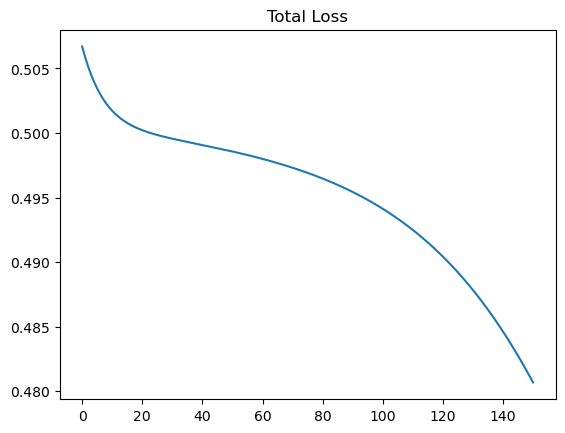

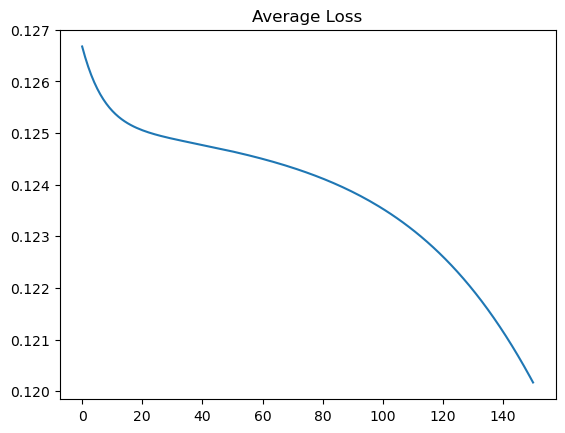

In [8]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax = plt.axes()
plt.title("Total Loss")
x = np.linspace(0, Epochs, Epochs)
ax.plot(x, TotalLoss)    

fig2 = plt.figure()
ax = plt.axes()
plt.title("Average Loss")
x = np.linspace(0, Epochs, Epochs)
ax.plot(x, AvgLoss)  

# Extra (matrix multiplication)

This is just to show examples for how matrix mult works


In [9]:
M1=np.array([[1, 2], [0, 1]])
print(np.mean(M1, axis=0))
print(np.mean(M1, axis=1))
M2 = np.array( [[3, 4], [-1, -1]])
V1 = np.array([[3, 4]])
N1 = 5

print("M1 * M2 = \n",M1*M2)

[0.5 1.5]
[1.5 0.5]
M1 * M2 = 
 [[ 3  8]
 [ 0 -1]]


In [10]:
print("M1 @ M2 = \n",M1@M2)

M1 @ M2 = 
 [[ 1  2]
 [-1 -1]]


In [11]:
print("M1 * V1 = \n",M1*V1)

M1 * V1 = 
 [[3 8]
 [0 4]]


In [12]:
print("M1 * N1 = \n",M1*N1)

M1 * N1 = 
 [[ 5 10]
 [ 0  5]]
